# Just How Profitable Are Blumhouse Movies?

Hey there,

Welcome to our deep dive into Blumhouse Productions' movie performance. We're about to unpack the numbers behind their intriguing business model.

Blumhouse has made a name for itself with a simple yet effective strategy: produce low to mid-budget horror movies that are accessible to a wide audience. Horror films are typically cheap to make and often draw large crowds, creating a recipe for potential profit.

In this notebook, we'll explore:

**1. The relationship between Blumhouse's modest budgets and box office returns**

**2. How their movies perform with critics and audiences**

**3. The financial success of their original concepts and established franchises like Halloween**

Our goal is to understand what makes Blumhouse tick financially. 

Are they consistently profitable? How do their "crowd-pleasers" perform compared to more prestigious projects like "Get Out"?

We'll use Python to analyze the data and create visualizations. By the end, we should have a clear picture of Blumhouse's approach to balancing art and commerce in the film industry.

Let's dive in and see just how profitable Blumhouse movies really are.

## Understanding the Data

This project analyzes the profitability of BlumHouse movies using a dataset that includes various attributes such as film titles, release years, production budgets, worldwide box office revenues, and audience ratings. Key metrics of interest include Return on Investment (ROI), MPAA ratings, and critical reception scores from platforms like IMDB and Rotten Tomatoes.

## Data Source

The data for this analysis was scraped from various websites like Box Office Mojo. The dataset was collected using BeautifulSoup for web scraping and pandas for data manipulation. This dataset provides a comprehensive overview of BlumHouse's filmography, allowing for an in-depth analysis of trends in profitability and audience reception. Let's start by reading in the data (which is stored as CSV file) and getting familiar with its structure.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import chardet

with open('../blumhouse/blumhouse_movies.csv', 'rb') as file:
    raw_data = file.read()

detected_encoding = chardet.detect(raw_data)['encoding']
print(f"Detected encoding: {detected_encoding}")

Detected encoding: Windows-1252


In [39]:
df = pd.read_csv("../blumhouse/blumhouse_movies.csv", encoding = detected_encoding) # read the data

df.head()

,Film Name,Release Year,Run Time,Length,Director,Stars,MP_Rating,IMDB Rating,Tomatometer,Distributor,Production Budget,Domestic Boxoffice,Worldwide Box office,ROI,Break Even
0,Get Out,2017,1h 44m,104,Jordan Peele,"Daniel Kaluuya, Allison Williams, Bradley Whit...",R,7.8,98,Universal Pictures,5000000.0,175837935.0,252297405.0,50.5,Success
1,Split,2016,1h 57m,117,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",PG-13,7.3,78,Universal Pictures,9000000.0,138141585.0,278754594.0,31.0,Success
2,The Invisible Man,2020,2h 4m,124,Leigh Whannell,"Elisabeth Moss, Oliver Jackson-Cohen, Harriet ...",R,7.1,92,Universal Pictures,7000000.0,64914050.0,139011965.0,19.9,Success
3,The Black Phone,2021,1h 43m,103,Scott Derrickson,"Mason Thames, Madeleine McGraw, Ethan Hawke",R,6.9,82,Universal Pictures,18000000.0,90123230.0,161441914.0,9.0,Success
4,Sinister,2012,1h 50m,110,Scott Derrickson,"Ethan Hawke, Juliet Rylance, James Ransone",R,6.8,63,Summit Entertainment,3000000.0,48086903.0,87727807.0,29.2,Success


In [40]:
df.tail(5)

,Film Name,Release Year,Run Time,Length,Director,Stars,MP_Rating,IMDB Rating,Tomatometer,Distributor,Production Budget,Domestic Boxoffice,Worldwide Box office,ROI,Break Even
105,Torn Hearts,2022,1h 37m,97,Brea Grant,"Katey Sagal, Abby Quinn, Alexxis Lemire",Not Rated,5.3,89,Epix,NaN,NaN,NaN,NaN,No Data
106,Insidious: The Red Door,2023,1h 47m,107,Patrick Wilson,"Patrick Wilson, Ty Simpkins, Rose Byrne",PG-13,5.5,39,Sony Pictures Releasing,16000000.0,82156962.0,186258928.0,11.6,Success
107,Soft & Quiet,2022,1h 32m,92,Beth de Araújo,"Stefanie Estes, Olivia Luccardi, Eleanore Pienta",R,6.2,84,Momentum Pictures,NaN,NaN,NaN,NaN,No Data
108,Imaginary,2024,1h 44m,104,Jeff Wadlow,"DeWanda Wise, Tom Payne, Taegen Burns",PG-13,4.7,24,Lionsgate,13000000.0,28009161.0,35768245.0,2.8,Success
109,M3gan,2023,1h 42m,102,Gerard Johnstone,"Allison Williams, Violet McGraw, Ronny Chieng",PG-13,6.3,93,Universal Pictures,12000000.0,95159005.0,181796517.0,15.1,Success


In [41]:
df.shape # shape of dataset

(110, 15)

In [42]:
df.columns # column names

Index(['Film Name', 'Release Year', 'Run Time', 'Length', 'Director', 'Stars',
       'MP_Rating', 'IMDB Rating', 'Tomatometer', 'Distributor',
       'Production Budget', 'Domestic Boxoffice', 'Worldwide Box office',
       'ROI', 'Break Even'],
      dtype='object')

In [43]:
df.isna().sum() # check missing values

Film Name                0
Release Year             0
Run Time                 0
Length                   0
Director                 0
Stars                    0
MP_Rating                0
IMDB Rating              0
Tomatometer              0
Distributor              0
Production Budget       48
Domestic Boxoffice      50
Worldwide Box office    37
ROI                     50
Break Even               0
dtype: int64

I will be keeping all rows in the dataset, including those with null values. This preserves all available information and allows for a more comprehensive analysis of Blumhouse's productions. 

For financial calculations, I'll use only rows with complete data, clearly stating the sample size for each analysis. This approach helps avoid bias and reflects real-world data availability challenges in the film industry.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Film Name             110 non-null    object 
 1   Release Year          110 non-null    int64  
 2   Run Time              110 non-null    object 
 3   Length                110 non-null    int64  
 4   Director              110 non-null    object 
 5   Stars                 110 non-null    object 
 6   MP_Rating             110 non-null    object 
 7   IMDB Rating           110 non-null    float64
 8   Tomatometer           110 non-null    int64  
 9   Distributor           110 non-null    object 
 10  Production Budget     62 non-null     float64
 11  Domestic Boxoffice    60 non-null     float64
 12  Worldwide Box office  73 non-null     float64
 13  ROI                   60 non-null     float64
 14  Break Even            110 non-null    object 
dtypes: float64(5), int64(3)

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Release Year,110.0,2.017664e+03,3.504328e+00,2007.0,2.015000e+03,2018.00,2.020750e+03,2024.0
Length,110.0,9.430909e+01,9.332537e+00,76.0,8.700000e+01,93.00,1.010000e+02,124.0
IMDB Rating,110.0,5.490909e+00,8.508544e-01,3.5,4.825000e+00,5.50,6.200000e+00,7.8
Tomatometer,110.0,4.876364e+01,2.889301e+01,0.0,2.525000e+01,49.50,7.100000e+01,100.0
Production Budget,62.0,7.689919e+06,6.243806e+06,25000.0,4.000000e+06,5000000.00,1.000000e+07,30000000.0
Domestic Boxoffice,60.0,5.044933e+07,4.441728e+07,7556.0,1.067261e+07,42975130.00,7.000720e+07,175837935.0
Worldwide Box office,73.0,7.739058e+07,7.986099e+07,7556.0,6.998359e+06,54104225.00,1.250103e+08,297144130.0
ROI,60.0,2.911167e+01,7.556450e+01,0.0,4.525000e+00,11.95,2.177500e+01,431.5


In [46]:
df['MP_Rating'].unique() # checking the unique values in the MP_Rating column

array(['R', 'PG-13', 'Not Rated', 'TV-MA', 'TV-14'], dtype=object)

In [47]:
df['Distributor'].unique()

array(['Universal Pictures', 'Summit Entertainment', 'FilmDistrict',
       'Netflix', 'Relativity Media', 'The Orchard',
       'BH Tilt and OTL Releasing', 'Paramount Pictures',
       'Dimension Films', 'RADiUS-TWC and Dimension Films',
       'BH Tilt and Orion Pictures', 'Amazon Studios', 'Focus Features',
       'Momentum Pictures', 'IFC Midnight',
       'Lionsgate and Roadside Attractions', 'Orion Pictures', 'Epix',
       'BH Tilt and High Top Releasing', 'Lionsgate', 'Gramercy Pictures',
       'Paramount+', 'Anchor Bay Films', ' ', 'Sony Pictures Releasing',
       'Cinedigm', 'Viva Pictures', 'Cinemax', 'Warner Bros. Pictures',
       'Gravitas Ventures', 'Amazon MGM Studios', 'Peacock', 'MGM+'],
      dtype=object)

In [48]:
df['Distributor'] = df['Distributor'].astype("category")

In [49]:
# I will add a new column that indicates whether a movie has complete financial data or not.

In [50]:
df['complete_data'] = df[['Production Budget', 'Worldwide Box office', 'ROI']].notnull().all(axis=1)

In [51]:
df.sample(5)

,Film Name,Release Year,Run Time,Length,Director,Stars,MP_Rating,IMDB Rating,Tomatometer,Distributor,Production Budget,Domestic Boxoffice,Worldwide Box office,ROI,Break Even,complete_data
17,Creep,2014,1h 17m,77,Patrick Brice,"Katie Aselton, Patrick Brice, Mark Duplass",R,6.3,91,The Orchard,NaN,NaN,NaN,NaN,No Data,False
26,Black Box,2020,1h 40m,100,Emmanuel Osei-Kuffour,"Mamoudou Athie, Phylicia Rashad, Amanda Christine",Not Rated,6.2,71,Amazon Studios,NaN,NaN,NaN,NaN,No Data,False
0,Get Out,2017,1h 44m,104,Jordan Peele,"Daniel Kaluuya, Allison Williams, Bradley Whit...",R,7.8,98,Universal Pictures,5000000.0,175837935.0,252297405.0,50.5,Success,True
88,Bingo Hell,2021,1h 25m,85,Gigi Saul Guerrero,"Adriana Barraza, L. Scott Caldwell, Joshua Cal...",Not Rated,4.3,66,Amazon Studios,NaN,NaN,NaN,NaN,No Data,False
89,The Gallows,2015,1h 21m,81,"Travis Cluff, Chris Lofing","Reese Mishler, Pfeifer Brown, Ryan Shoos",R,4.2,15,Warner Bros. Pictures,100000.0,22764410.0,41656474.0,416.6,Success,True


## What's the typical budget range for Blumhouse movies?

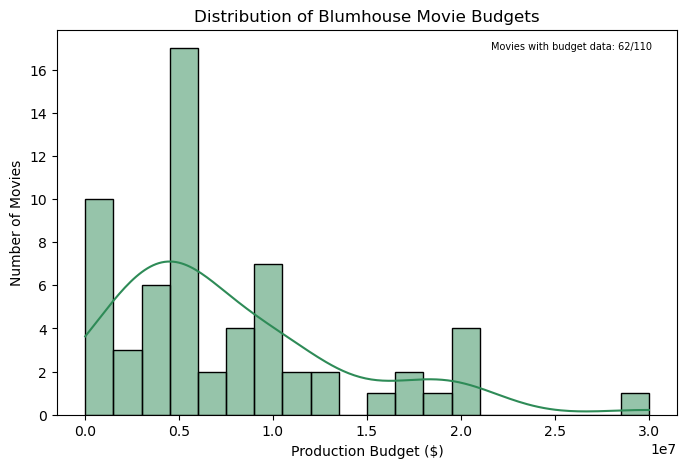

In [52]:
# Create a histogram of budgets
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Production Budget', bins=20, kde=True, color='seagreen')

# Set labels and title
plt.xlabel('Production Budget ($)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Blumhouse Movie Budgets')

# Add text to show number of movies with budget data
movies_with_budget = df['Production Budget'].notna().sum()
total_movies = len(df)
plt.text(0.7, 0.95, f'Movies with budget data: {movies_with_budget}/{total_movies}', 
         transform=plt.gca().transAxes, fontsize=7)

# Show the plot
plt.show()

The majority of Blumhouse movies have production budgets under `$10 million`, with a significant cluster in the `$5-10 million range`. There's a **noticeable drop-off** in frequency for budgets `above $15 million`, suggesting these are less common for Blumhouse. The data shows 62 out of 110 movies have budget information, which gives us a good sample to work with but also indicates some gaps in publicly available budget data for Blumhouse productions.

<Axes: xlabel='Production Budget'>

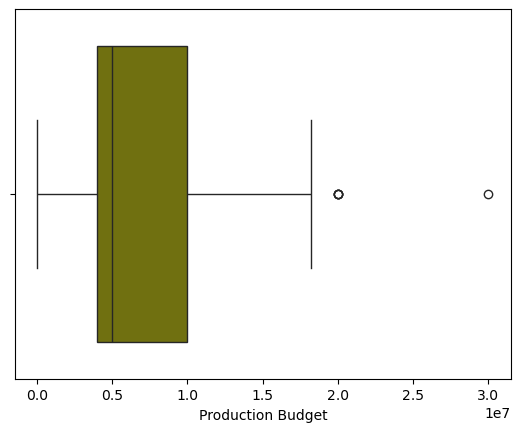

In [53]:
sns.boxplot(x='Production Budget',
           color='olive',
           data=df)

The box plot above shows the distribution of production budgets for Blumhouse movies. Most of the movies fall within the `$5-10 million range`. There are a few outliers with much higher budgets, up to `$30 million`, but these are rare exceptions. The **median budget** is around `$5 million`, which aligns with Blumhouse’s strategy of producing lower-budget films. 

In [54]:
# Filter the DataFrame for complete data
df_complete = df[df['complete_data']].set_index('Film Name')
df_complete.head(5)

,Release Year,Run Time,Length,Director,Stars,MP_Rating,IMDB Rating,Tomatometer,Distributor,Production Budget,Domestic Boxoffice,Worldwide Box office,ROI,Break Even,complete_data
Film Name,,,,,,,,,,,,,,,
Get Out,2017,1h 44m,104,Jordan Peele,"Daniel Kaluuya, Allison Williams, Bradley Whit...",R,7.8,98,Universal Pictures,5000000.0,175837935.0,252297405.0,50.5,Success,True
Split,2016,1h 57m,117,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",PG-13,7.3,78,Universal Pictures,9000000.0,138141585.0,278754594.0,31.0,Success,True
The Invisible Man,2020,2h 4m,124,Leigh Whannell,"Elisabeth Moss, Oliver Jackson-Cohen, Harriet ...",R,7.1,92,Universal Pictures,7000000.0,64914050.0,139011965.0,19.9,Success,True
The Black Phone,2021,1h 43m,103,Scott Derrickson,"Mason Thames, Madeleine McGraw, Ethan Hawke",R,6.9,82,Universal Pictures,18000000.0,90123230.0,161441914.0,9.0,Success,True
Sinister,2012,1h 50m,110,Scott Derrickson,"Ethan Hawke, Juliet Rylance, James Ransone",R,6.8,63,Summit Entertainment,3000000.0,48086903.0,87727807.0,29.2,Success,True


In [55]:
df['Production Budget']

0       5000000.0
1       9000000.0
2       7000000.0
3      18000000.0
4       3000000.0
          ...    
105           NaN
106    16000000.0
107           NaN
108    13000000.0
109    12000000.0
Name: Production Budget, Length: 110, dtype: float64

In [56]:
# define budget ranges using pd.cut
bins = [0, 5000000, 10000000, 20000000, 50000000]
labels = ['Low (<5M)', 'Mid (5M-10M)', 'High (10M-20M)', 'Very High (20M-50M)']
df_complete.loc[:, 'Budget Range'] = pd.cut(df_complete['Production Budget'], bins, labels=labels)

average_roi_by_budget = df_complete.groupby('Budget Range', observed=True)['ROI'].mean().sort_values()

average_roi_by_budget

Budget Range
Very High (20M-50M)     4.600000
High (10M-20M)          7.900000
Mid (5M-10M)           12.150000
Low (<5M)              44.763636
Name: ROI, dtype: float64

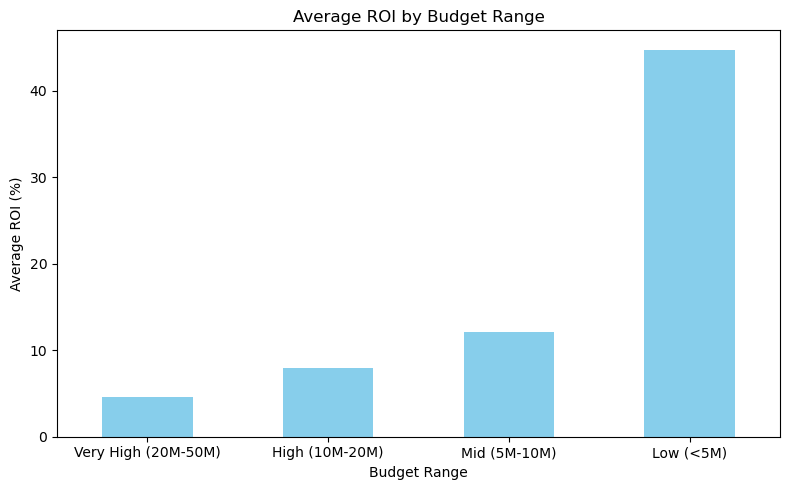

In [57]:
plt.figure(figsize=(8, 5))
# create the bar chart
average_roi_by_budget.plot(kind='bar', color='skyblue')
plt.title('Average ROI by Budget Range')
plt.xlabel('Budget Range')
plt.ylabel('Average ROI (%)')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

Blumhouse's data confirms their reputation for success with **low-budget films**, showing an impressive **average ROI of 44.76 for movies under $5M**. 

This ROI drastically outperforms their higher-budget productions, with films in the **`$20M-$50M range` averaging only 4.6**. The clear inverse relationship between budget and ROI suggests that Blumhouse's strategy of focusing on low to mid-range budget films is financially sound. However, it's worth noting that **even their highest-budget category still maintains profitability**. This data supports Blumhouse's approach of producing accessible, wide-appeal horror movies on modest budgets. 

It also prompts us to investigate how Blumhouse balances making popular, profitable films with creating critically acclaimed movies that might enhance their reputation.

Let's take a look at which movies had the highest ROI...

In [58]:
df_complete.sample(5)

,Release Year,Run Time,Length,Director,Stars,MP_Rating,IMDB Rating,Tomatometer,Distributor,Production Budget,Domestic Boxoffice,Worldwide Box office,ROI,Break Even,complete_data,Budget Range
Film Name,,,,,,,,,,,,,,,,
The Darkness,2016,1h 32m,92,Greg McLean,"Kevin Bacon, Radha Mitchell, David Mazouz",PG-13,4.5,3,BH Tilt and High Top Releasing,4000000.0,10753574.0,10904495.0,2.7,Success,True,Low (<5M)
Unfriended: Dark Web,2018,1h 32m,92,Stephen Susco,"Colin Woodell, Stephanie Nogueras, Betty Gabriel",R,6.0,59,BH Tilt and OTL Releasing,1000000.0,8866745.0,16434588.0,16.4,Success,True,Low (<5M)
Ouija,2014,1h 29m,89,Stiles White,"Olivia Cooke, Ana Coto, Daren Kagasoff",PG-13,4.5,6,Universal Pictures,5000000.0,50856010.0,103300632.0,20.7,Success,True,Low (<5M)
Incarnate,2016,1h 27m,87,Brad Peyton,"Aaron Eckhart, Carice van Houten, Catalina San...",PG-13,5.3,17,BH Tilt and High Top Releasing,5000000.0,4799774.0,9371036.0,1.9,Flop,True,Low (<5M)
13 Sins,2014,1h 33m,93,Daniel Stamm,"Mark Webber, Devon Graye, Tom Bower",R,6.3,66,RADiUS-TWC and Dimension Films,4000000.0,9134.0,47552.0,0.0,Flop,True,Low (<5M)


In [59]:
top_20 = df_complete[['ROI']].sort_values(by='ROI', ascending=False).head(20)

In [60]:
top_20 = top_20.sort_values(by='ROI', ascending=True)
top_20

,ROI
Film Name,
Paranormal Activity: The Marked Ones,18.2
Exeter,19.6
The Visit,19.7
The Invisible Man,19.9
Ouija,20.7
Happy Death Day,25.0
Halloween,25.5
Truth or Dare,27.2
Paranormal Activity 4,28.6


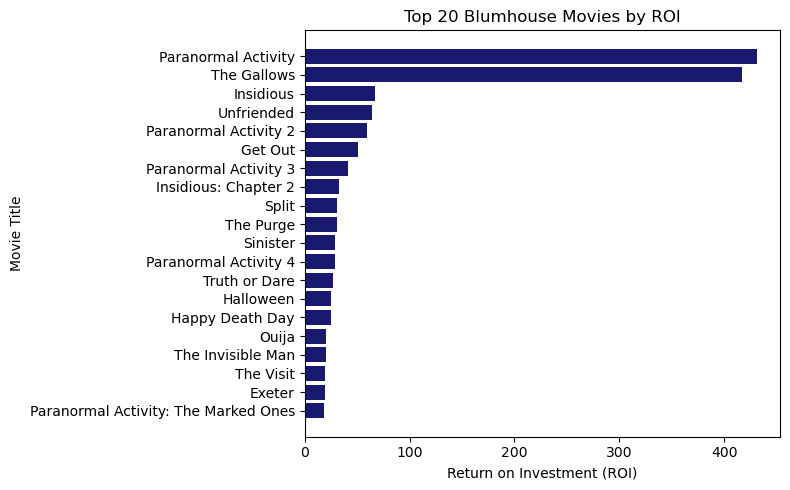

In [61]:
# Create the plot
plt.figure(figsize=(8, 5))
plt.barh(top_20.index, top_20['ROI'], color='midnightblue')
plt.title('Top 20 Blumhouse Movies by ROI')
plt.ylabel('Movie Title')
plt.xlabel('Return on Investment (ROI)')
plt.tight_layout()
plt.show()

The chart illustrates the top 20 Blumhouse movies ranked by their Return on Investment (ROI), with **"Paranormal Activity: The Marked Ones"** and **"Exeter"** significantly outperforming the rest, boasting ROIs of **431.50** and **416.60** respectively. 

There's a notable drop-off after the top two, with **"The Visit"** coming in third at an ROI of **66.60**, followed by a gradual decrease in ROI among the remaining films. The **Paranormal Activity franchise** features prominently in the list, *appearing four times and demonstrating its consistent profitability for Blumhouse.*

## Profitability Analysis

### The Blumhouse Formula: Low Budget, High Returns
How Does Budget Affect Box Office Performance?

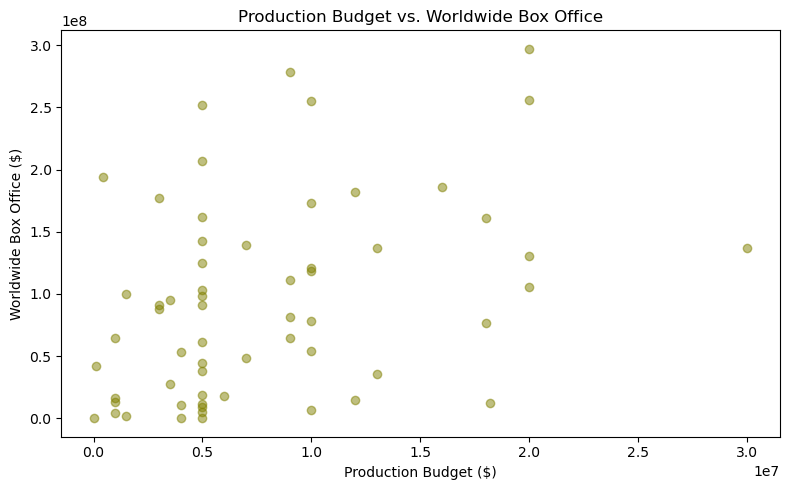

In [62]:
plt.figure(figsize=(8, 5))

data = df_complete[['Production Budget', 'Worldwide Box office']]

plt.scatter(data['Production Budget'], data['Worldwide Box office'], c='olive', alpha=0.5)
plt.title('Production Budget vs. Worldwide Box Office')
plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Box Office ($)')
plt.tight_layout()
plt.show()

From the scatter plot, we see there's a significant spread in both budget and box office earnings, indicating diverse outcomes across Blumhouse's portfolio. 

**Low budget success:** Many films with relatively small budgets (clustered on the left side of the chart) have achieved substantial box office returns, some even outperforming higher-budget productions.

**Outliers:** Some notable outliers exist, particularly films with moderate budgets that achieved exceptionally high box office returns (visible as points high on the y-axis).

**Budget consistency:** Most of Blumhouse's productions fall within a lower budget range (clustered on the left half of the x-axis), aligning with their known strategy of producing lower-budget films.

**Varying returns:** Even within similar budget ranges, there's considerable variation in box office performance, suggesting factors beyond budget significantly influence a film's financial success.

In [63]:
# Calculate the correlation coefficient between production budget and worldwide box office, using the pearsonr() function from SciPy
from scipy.stats import pearsonr

In [64]:
# Calculate correlation coefficient
r, p_value = pearsonr(df_complete['Production Budget'], df_complete['Worldwide Box office'])

print(f"Correlation coefficient (r): {r:.2f}")
print(f"p-value: {p_value:.4f}")

Correlation coefficient (r): 0.38
p-value: 0.0030


The correlation coefficient (r) of `0.38` indicates a **weak to moderate positive relationship** between `budget` and `box office earnings`. The p-value of `0.0030` is much less than the conventional significance level of 0.05, indicating that this correlation is statistically significant and unlikely to have occurred by chance.

While statistically significant, the weak to moderate positive correlation (r = 0.38) suggests that production budget is one factor that influences worldwide box office performance, **but it is not the only factor**. Other variables, such as *marketing, release timing, critical reception, and audience appeal,* also play important roles in determining a film's box office success.

### Blockbuster or Bust: Top 10 Hits and Misses
Which movies had the highest and lowest ROI?

In [65]:
# Sort by ROI descending to get top hits
top_hits = df_complete[['ROI']].sort_values('ROI', ascending=False).head(10).sort_values('ROI', ascending=True)
top_hits

,ROI
Film Name,
The Purge,30.4
Split,31.0
Insidious: Chapter 2,32.4
Paranormal Activity 3,41.4
Get Out,50.5
Paranormal Activity 2,59.2
Unfriended,64.4
Insidious,66.6
The Gallows,416.6


In [66]:
top_misses = df_complete[['ROI']].sort_values('ROI', ascending=True).head(10)
top_misses

,ROI
Film Name,
Area 51,0.0
13 Sins,0.0
The Hunt,0.7
Jessabelle,0.7
The Lords of Salem,1.0
Don't Let Go,1.1
Firestarter,1.3
Incarnate,1.9
The Belko Experiment,2.4


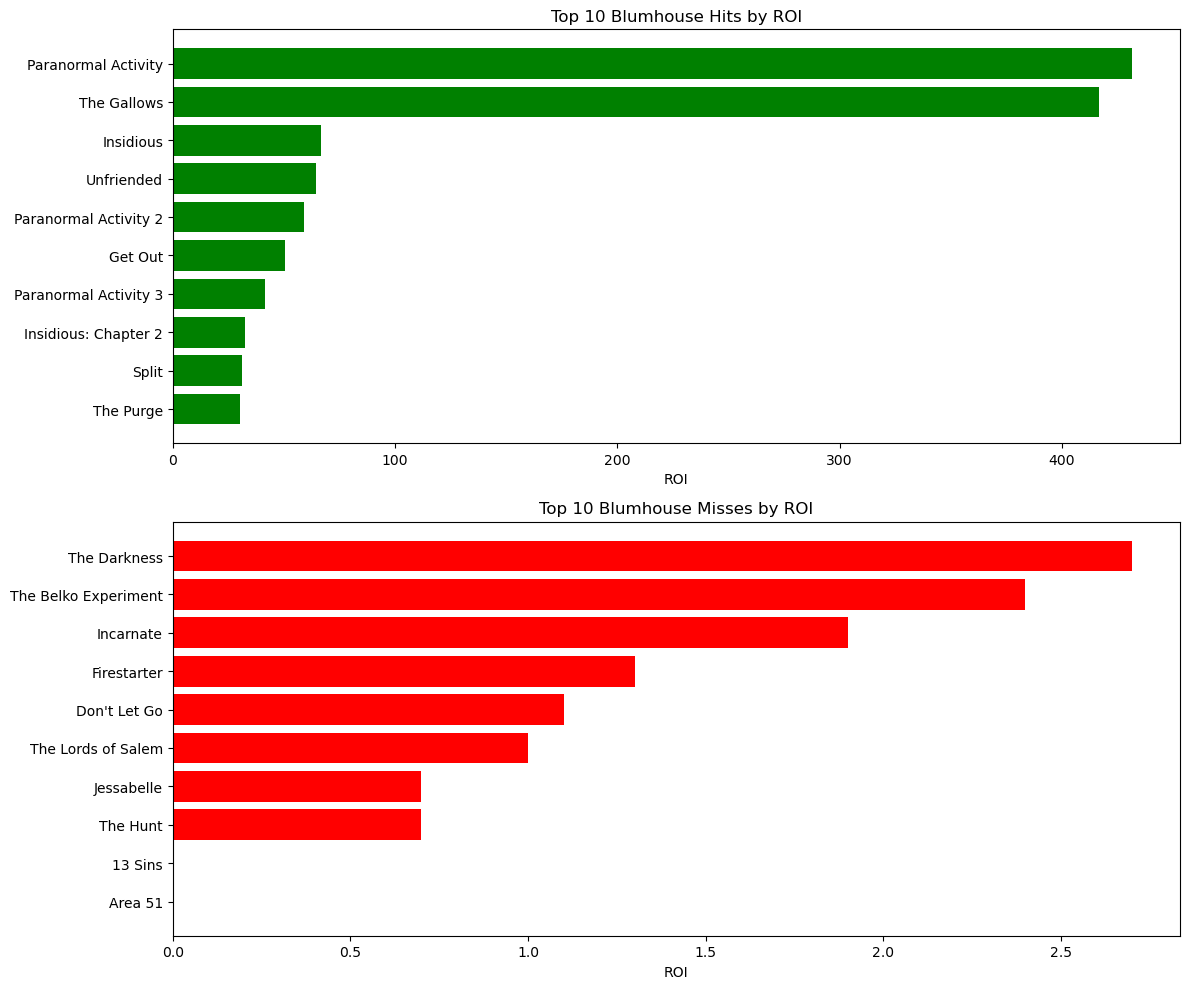

In [67]:
# Create a dual bar chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot top hits
ax1.barh(top_hits.index, top_hits['ROI'], color='green')
ax1.set_title('Top 10 Blumhouse Hits by ROI')
ax1.set_xlabel('ROI')

# Plot top misses
ax2.barh(top_misses.index, top_misses['ROI'], color='red')
ax2.set_title('Top 10 Blumhouse Misses by ROI')
ax2.set_xlabel('ROI')

plt.tight_layout()
plt.show()

The analysis of the top hits and misses from Blumhouse Productions highlights the stark contrast in Return on Investment (ROI) among their films. Blumhouse's top-performing films, particularly entries in the **Paranormal Activity** franchise, demonstrate exceptional ROI with the original Paranormal Activity film leading at an astounding `431.5` times its budget.

Other **top hits**, including *Get Out* (50.5), *Insidious* (66.6), and *The Purge* (30.4), **demonstrate exceptional profitability**, showcasing how low-budget horror films can yield substantial financial returns. 

Conversely, the **top misses**, such as *Area 51* (0.0), *13 Sins* (0.0), and *The Hunt* (0.7), reveal **significant financial failures**, with many films barely breaking even or resulting in losses. 

The stark contrast between the highest ROI of 431.5 and the lowest of 0.0 underscores the volatility of the film industry and **Blumhouse's high-risk, high-reward approach**, *where massive successes can offset the losses from underperforming projects.*

### The Sweet Spot: Finding the Ideal Budget Range

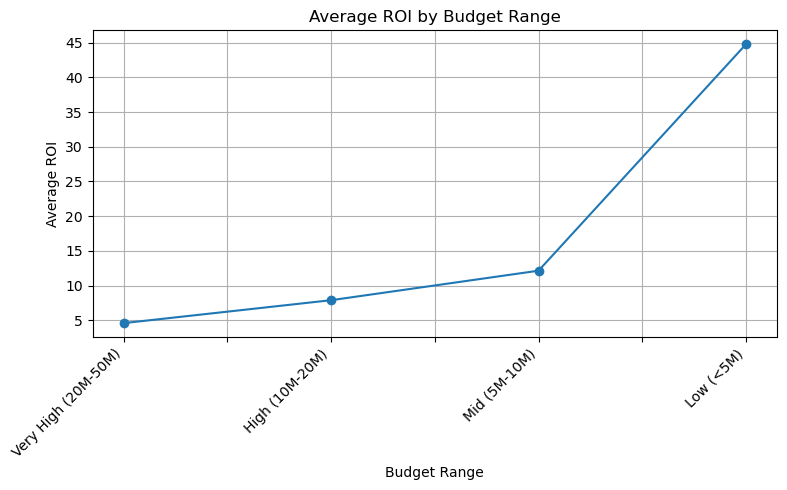

In [68]:
import matplotlib.pyplot as plt

# Assuming average_roi_by_budget is already calculated

# Create the line chart
plt.figure(figsize=(8, 5))
average_roi_by_budget.plot(kind='line', marker='o')

# Add labels and title
plt.xlabel('Budget Range')
plt.ylabel('Average ROI')
plt.title('Average ROI by Budget Range')

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)  # Optional: Add grid for easier interpretation
plt.tight_layout()
plt.show()

## Ratings Analysis

### Critics vs. Cash: Do Ratings Predict Profitability?
How do critic and audience ratings relate to financial success?

In [69]:
# Calculate the correlation matrix
correlation_matrix = df_complete[['IMDB Rating', 'Tomatometer', 'ROI']].corr()
correlation_matrix

,IMDB Rating,Tomatometer,ROI
IMDB Rating,1.000000,0.829553,-0.029739
Tomatometer,0.829553,1.000000,0.065412
ROI,-0.029739,0.065412,1.000000


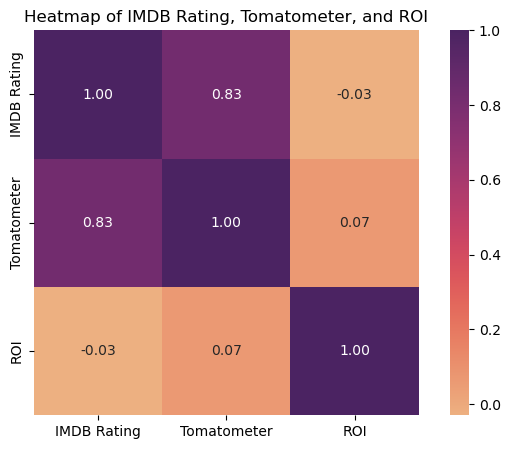

In [70]:
# Create the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt='.2f', square=True)

# Add labels and title
plt.title('Heatmap of IMDB Rating, Tomatometer, and ROI')
plt.show()

The analysis shows a strong agreement between `IMDB ratings` and `Tomatometer scores` (correlation: 0.83).

Surprisingly, there's **almost no relationship between ratings and financial success (ROI)** for Blumhouse films. The correlations are near zero for both `IMDB ratings` (-0.03) and `Tomatometer scores` (0.07) versus `ROI`.

This suggests that for Blumhouse, making a "good" movie (as per ratings) doesn't necessarily translate to higher profitability, and vice versa. Their financial success seems to be driven by factors other than critical reception.

In essence, while Blumhouse consistently produces movies that critics and audiences agree on quality-wise, **this quality doesn't seem to be a strong predictor of their financial performance**. This indicates that Blumhouse's success may have less to do with making highly praised movies and more to do with their production and marketing techniques.

**A real-life example illustrates this point:**

While creating this notebook, I had a friend (who is a regular user of the IMDB ratings app) watch **"Five Nights at Freddy's (2023)"**. Despite her low rating of the movie, it achieved an **impressive ROI** of `14.9`. This case perfectly encapsulates our finding - *a movie can be financially successful for Blumhouse regardless of its critical reception.*

This disconnect between ratings and profitability highlights Blumhouse's unique position in the industry. They seem to have mastered the art of creating commercially viable films that don't necessarily need critical acclaim to turn a profit. It raises interesting questions about their **target audience, marketing strategies**, and how they balance artistic and commercial considerations in their filmmaking process.

## MPAA Ratings Impact

### The Rating Game: R-Rated Horror vs. PG-13 Thrillers

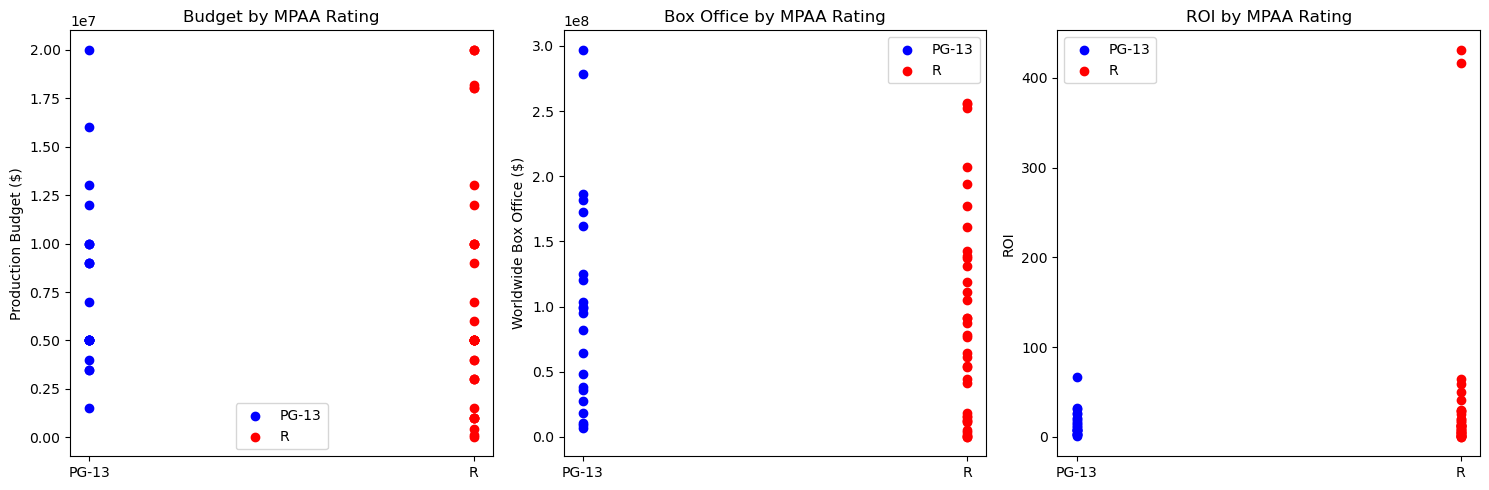


Average values for PG-13 movies:
Budget: $7,840,909.09
Box Office: $84,309,869.67
ROI: 15.64

Average values for R movies:
Budget: $7,191,447.37
Box Office: $75,222,272.40
ROI: 37.78


In [71]:

# Filter the data
pg13_data = df_complete[df_complete['MP_Rating'] == 'PG-13']
r_data = df_complete[df_complete['MP_Rating'] == 'R']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Budget comparison
ax1.scatter(pg13_data['MP_Rating'], pg13_data['Production Budget'], color='blue', label='PG-13')
ax1.scatter(r_data['MP_Rating'], r_data['Production Budget'], color='red', label='R')
ax1.set_ylabel('Production Budget ($)')
ax1.set_title('Budget by MPAA Rating')

# Box Office comparison
ax2.scatter(pg13_data['MP_Rating'], pg13_data['Worldwide Box office'], color='blue', label='PG-13')
ax2.scatter(r_data['MP_Rating'], r_data['Worldwide Box office'], color='red', label='R')
ax2.set_ylabel('Worldwide Box Office ($)')
ax2.set_title('Box Office by MPAA Rating')

# ROI comparison
ax3.scatter(pg13_data['MP_Rating'], pg13_data['ROI'], color='blue', label='PG-13')
ax3.scatter(r_data['MP_Rating'], r_data['ROI'], color='red', label='R')
ax3.set_ylabel('ROI')
ax3.set_title('ROI by MPAA Rating')

# Add legend
for ax in (ax1, ax2, ax3):
    ax.legend()

plt.tight_layout()
plt.show()

# Print average values
for rating in ['PG-13', 'R']:
    subset = df[df['MP_Rating'] == rating]
    print(f"\nAverage values for {rating} movies:")
    print(f"Budget: ${subset['Production Budget'].mean():,.2f}")
    print(f"Box Office: ${subset['Worldwide Box office'].mean():,.2f}")
    print(f"ROI: {subset['ROI'].mean():.2f}")

Based on the scatter plots comparing `PG-13` and `R-rated` Blumhouse movies, there are three key insights:

**Budget Distribution:** R-rated movies show a wider range of budgets, with some higher-budget outliers. PG-13 movies seem to have a more consistent budget range, mostly clustering in the lower to mid-range.

**Box Office Performance:** Both PG-13 and R-rated movies demonstrate a wide range of box office returns. However, PG-13 movies appear to have a slight edge in terms of highest-grossing outliers, with a few reaching higher box office numbers than the top R-rated films.

**Return on Investment (ROI):** R-rated movies show a much wider range of ROI, including some extremely high performers (400%+ ROI). While PG-13 movies have some high ROI outliers, they generally seem to have a more concentrated, moderate ROI range compared to the more varied performance of R-rated films.

These observations suggest that **while R-rated movies might be riskier investments for Blumhouse,** they also have the *potential for exceptionally high returns*. **PG-13 movies**, on the other hand, *appear to offer more consistent, though potentially lower, returns.*

## Directors with the Midas Touch 
Which directors consistently deliver high ROI for Blumhouse?

In [107]:
# Group by 'Director' and calculate the mean ROI and count of films
director_stats = df_complete.reset_index(drop=False).groupby('Director').agg({
    'ROI': 'mean',
    'Film Name': 'count'
}).reset_index()

In [108]:
# Rename columns for clarity
director_stats.columns = ['Director', 'Average ROI', 'Number of Movies']

In [109]:
# Sort by Average ROI descending
director_stats_sorted = director_stats.sort_values('Average ROI', ascending=False)

In [110]:
# Select top 10 directors (you can adjust this number)
top_directors = director_stats_sorted.head(10)

In [118]:
top_directors = top_directors.sort_values('Average ROI', ascending=True)

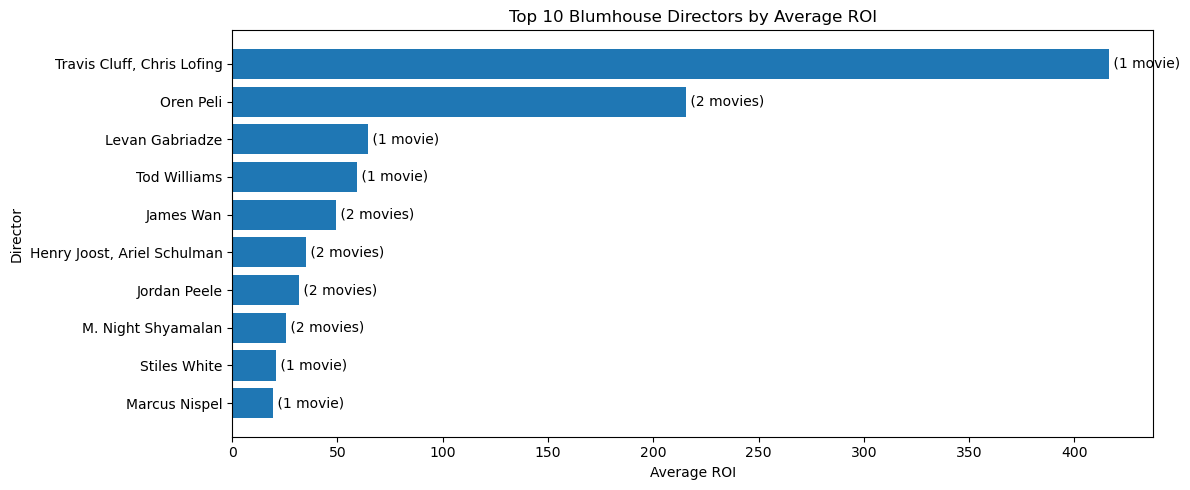

In [126]:
# Create horizontal bar chart
plt.figure(figsize=(12, 5))
bars = plt.barh(top_directors['Director'], top_directors['Average ROI'])

# Add number of movies as text on the bars
for i, bar in enumerate(bars):
    movie_count = top_directors['Number of Movies'].iloc[i]
    movie_text = "movie" if movie_count == 1 else "movies"
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f" ({movie_count} {movie_text})", 
             va='center')

plt.title('Top 10 Blumhouse Directors by Average ROI')
plt.xlabel('Average ROI')
plt.ylabel('Director')
plt.tight_layout()
plt.show()